# Preparing factor risk to covid dataset
## Workflow: execute after 02_analysis_correlation_attributes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, spearmanr
import matplotlib as mpl

from util import centimeter_to_inch, get_default_colors_heatmap

mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

## Loading data

In [2]:
df = pd.read_csv('data/df_sociodemographic_covid.csv', index_col=0)
df.CODIGO_MUNICIPIO_6 = df.CODIGO_MUNICIPIO_6.astype('Int64')

## Selecton attributes

In [3]:
selected_attributes = ['PERCENTUAL_POPULACAO_0_A_5_ANOS',
          'PERCENTUAL_POPULACAO_6_A_14_ANOS',
          'PERCENTUAL_POPULACAO_15_A_24_ANOS',
          'PERCENTUAL_POPULACAO_25_A_39_ANOS',
          'PERCENTUAL_POPULACAO_40_A_59_ANOS',
          'PERCENTUAL_POPULACAO_60_ANOS_OU_MAIS',
         'PERCENTUAL_POPULACAO_URBANA',
         'IDHM_RENDA',
          'GINI',
          'TRANSFERENCIA_PERCAPTA_BOLSA_FAMILIA',
         'TAXA_ATIVIDADE',
         'PERCENTUAL_TRABALHADORES_INFORMAIS',
          'PERCENTUAL_OCUPADOS_AGROPECUARIA',
          'PERCENTUAL_OCUPADOS_COMERCIO',
         'PERCENTUAL_OCUPADOS_SERVICO',
         'PERCENTUAL_OCUPADOS_INDUSTRIA']

df_selected_attributes = df[selected_attributes]

## Removing missing data

In [4]:
df_selected_attributes = df_selected_attributes.dropna()

In [5]:
print(len(df_selected_attributes))

5565


## Dimensionality reduction

In [6]:
df_normalized = pd.DataFrame(preprocessing.Normalizer().fit_transform(df_selected_attributes), columns=selected_attributes, index=df_selected_attributes.index)

In [7]:
pca = PCA(n_components=2, whiten=False)
pca_transformed = pca.fit_transform(df_normalized)
print(sum(pca.explained_variance_ratio_))
colunas = ['componente_principal_1', 'componente_principal_2']
df_pca = pd.DataFrame(pca_transformed, columns=colunas, index=df_normalized.index)

0.9184118564854182


In [8]:
df_pca

,componente_principal_1,componente_principal_2
0,0.072382,0.095282
1,0.400133,-0.093054
2,0.293257,0.289881
3,0.470971,-0.038864
4,0.375095,-0.012960
...,...,...
5565,0.365648,0.008712
5566,0.068160,-0.086597
5567,-0.115389,-0.118670
5568,-0.194950,0.182157


In [9]:
pca.explained_variance_ratio_

array([0.76707906, 0.1513328 ])

In [10]:
eigenvalues = pca.explained_variance_
eigenvalues

array([0.13497167, 0.02662782])

In [11]:
pca.singular_values_

array([27.40405768, 12.17198301])

In [12]:
df_eigenvectors = pd.DataFrame(pca.components_, columns=df_selected_attributes.columns)
df_eigenvectors

,PERCENTUAL_POPULACAO_0_A_5_ANOS,PERCENTUAL_POPULACAO_6_A_14_ANOS,PERCENTUAL_POPULACAO_15_A_24_ANOS,PERCENTUAL_POPULACAO_25_A_39_ANOS,PERCENTUAL_POPULACAO_40_A_59_ANOS,PERCENTUAL_POPULACAO_60_ANOS_OU_MAIS,PERCENTUAL_POPULACAO_URBANA,IDHM_RENDA,GINI,TRANSFERENCIA_PERCAPTA_BOLSA_FAMILIA,TAXA_ATIVIDADE,PERCENTUAL_TRABALHADORES_INFORMAIS,PERCENTUAL_OCUPADOS_AGROPECUARIA,PERCENTUAL_OCUPADOS_COMERCIO,PERCENTUAL_OCUPADOS_SERVICO,PERCENTUAL_OCUPADOS_INDUSTRIA
0,0.023535,0.044085,0.069089,0.114667,0.145720,0.069335,0.462917,0.004062,0.001831,-0.748079,0.354484,0.030694,0.026000,0.069318,0.176747,0.127607
1,0.002520,0.024704,0.017196,0.006380,0.093256,0.074650,-0.527377,0.001299,0.000847,-0.210287,0.239126,0.384755,0.641686,-0.076990,-0.175395,-0.093587


In [13]:
(df_eigenvectors * df_eigenvectors).T.sum()

0    1.0
1    1.0
dtype: float64

In [14]:
yticklabels_without_number = [
    '% population 0 - 5 years',
    '% population 6 - 14 years',
    '% population 15 - 24 years',
    '% population 25 - 39 years',
    '% population 40 - 59 years',
    '% population +60 years',
    '% urban population',
    'IDHM - income',
    'Gini coefficient',
    'Social transfer\nper capita',
    'Activity rate',
    '% informal workers',
    '% employed in agriculture',
    '% employed in commerce',
    '% employed in service',
    '% employed in industry']

In [15]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['0_abs'] = df_eigenvectors_T[0].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='0_abs', ascending=False)
df_eigenvectors_T

,index,0,1,0_abs
9,Social transfer\nper capita,-0.748079,-0.210287,0.748079
6,% urban population,0.462917,-0.527377,0.462917
10,Activity rate,0.354484,0.239126,0.354484
14,% employed in service,0.176747,-0.175395,0.176747
4,% population 40 - 59 years,0.145720,0.093256,0.145720
15,% employed in industry,0.127607,-0.093587,0.127607
3,% population 25 - 39 years,0.114667,0.006380,0.114667
5,% population +60 years,0.069335,0.074650,0.069335
13,% employed in commerce,0.069318,-0.076990,0.069318
2,% population 15 - 24 years,0.069089,0.017196,0.069089


In [16]:
df_eigenvectors_T['0_abs'].sum()

2.4681713272336654

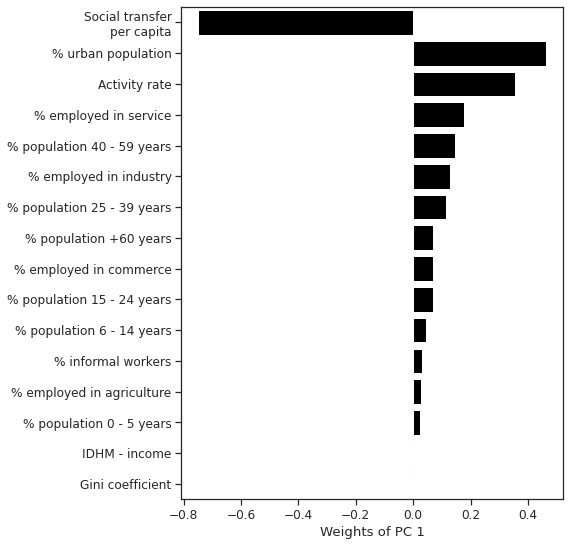

In [17]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(23)))
sns.barplot(x=0, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 1')
plt.ylabel(None)
plt.show()

In [18]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['1_abs'] = df_eigenvectors_T[1].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='1_abs', ascending=False)
df_eigenvectors_T

,index,0,1,1_abs
12,% employed in agriculture,0.026000,0.641686,0.641686
6,% urban population,0.462917,-0.527377,0.527377
11,% informal workers,0.030694,0.384755,0.384755
10,Activity rate,0.354484,0.239126,0.239126
9,Social transfer\nper capita,-0.748079,-0.210287,0.210287
14,% employed in service,0.176747,-0.175395,0.175395
15,% employed in industry,0.127607,-0.093587,0.093587
4,% population 40 - 59 years,0.145720,0.093256,0.093256
13,% employed in commerce,0.069318,-0.076990,0.076990
5,% population +60 years,0.069335,0.074650,0.074650


In [19]:
df_eigenvectors_T['1_abs'].sum()

2.5700572462175746

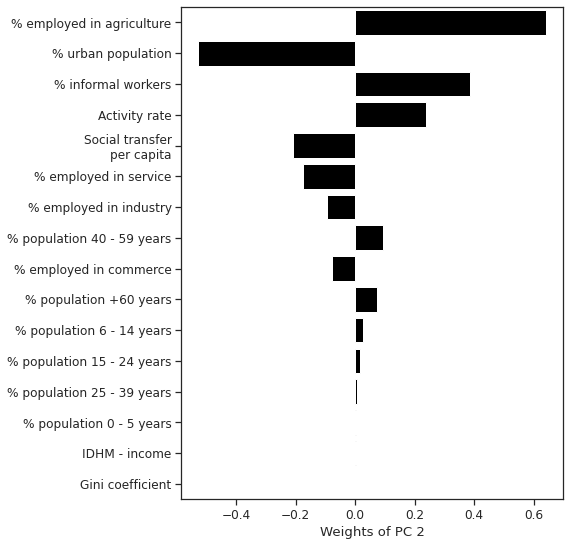

In [20]:
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(23)))
sns.barplot(x=1, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 2')
plt.ylabel(None)
plt.show()

In [21]:
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpl.patches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

def biplot(score, coeff, feature_names, filtro_atributos):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    sns.set(font_scale=1.1)
    sns.set_style("ticks")

    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(17.4)))
    # handle_scatterplot = sns.scatterplot(x=xs, y=ys, color='w', edgecolor='gainsboro', legend=True)
    handle_scatterplot = plt.scatter(x=xs, y=ys, c='w', edgecolors='gainsboro')

    handle_top_five_influence = None
    handle_low_influence = None
    for i in range(n):
        if feature_names[i] in filtro_atributos:
            #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_top_five_influence is None:
                handle_top_five_influence = handle
            ha = 'left'
            if feature_names[i] == '% urban population':
                ha = 'center'
            plt.text(coeff[i,0] + 0.025, coeff[i,1] - 0.035, feature_names[i], color = 'black', ha = ha, va = 'top')
        else:
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'gray', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_low_influence is None:
                handle_low_influence = handle

    plt.xlabel("Principal component {}".format(1))
    plt.ylabel("Principal component {}".format(2))
    lim = 0.82
    plt.xlim([-lim,lim])
    plt.ylim([-lim,lim])
    plt.legend([handle_top_five_influence, handle_low_influence, handle_scatterplot], ['Top 5 weights', 'Low influence weights', 'Point scores'], handler_map={mpl.patches.FancyArrow : mpl.legend_handler.HandlerPatch(patch_func=make_legend_arrow)})
    # plt.legend([handle_scatterplot], ['Point score'])
    plt.tick_params(axis='both', which='both', labelsize=14)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


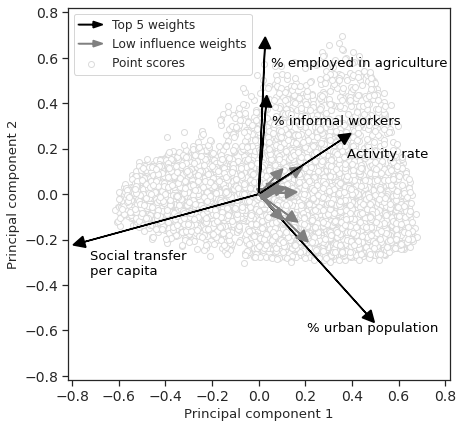

In [22]:
# Call the biplot function for only the first 2 PCs
attributes_filter = ['Social transfer\nper capita', 'Activity rate', '% informal workers', '% employed in agriculture', '% urban population']
biplot(pca_transformed[:,0:2], np.transpose(pca.components_[0:2, :]), yticklabels_without_number, attributes_filter)
plt.savefig('images/biplot_pca.eps', bbox_inches="tight")
plt.show()

In [23]:
vector_correlation_principal_component_1 = []
vector_correlation_principal_component_2 = []

vector_pvalue_principal_component_1 = []
vector_pvalue_principal_component_2 = []

for attribute in selected_attributes:
    correlation_componente_principal_1, pvalue_componente_principal_1 = spearmanr(df_selected_attributes[attribute].values, df_pca.componente_principal_1.values)
    correlation_componente_principal_2, pvalue_componente_principal_2 = spearmanr(df_selected_attributes[attribute].values, df_pca.componente_principal_2.values)

    vector_correlation_principal_component_1.append(correlation_componente_principal_1)
    vector_correlation_principal_component_2.append(correlation_componente_principal_2)

    vector_pvalue_principal_component_1.append(round(pvalue_componente_principal_1, 2))
    vector_pvalue_principal_component_2.append(round(pvalue_componente_principal_2, 2))

correlation_plot_data = np.array([vector_correlation_principal_component_1, vector_correlation_principal_component_2])
pvalue_plot_data = np.array([vector_pvalue_principal_component_1, vector_pvalue_principal_component_2])

In [24]:
xticklabels = ['PC 1', 'PC 2']

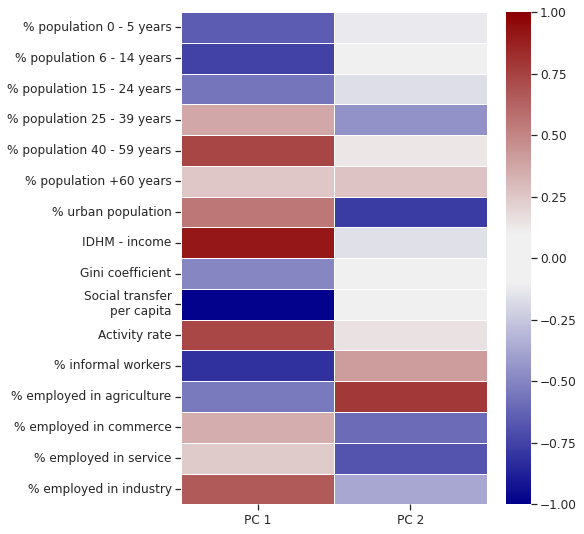

In [25]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
palette = get_default_colors_heatmap()
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(23)))
sns.heatmap(correlation_plot_data.T, cmap=palette, linewidths=.7, annot=False, yticklabels=yticklabels_without_number, xticklabels=xticklabels, vmin=-1, vmax=1)
plt.show()

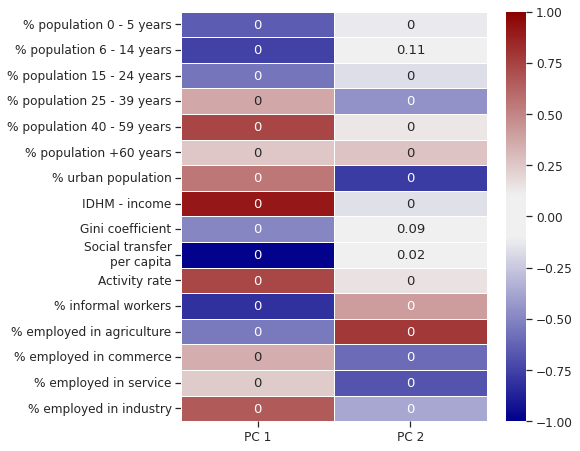

In [26]:
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(19.14)))
sns.heatmap(correlation_plot_data.T, cmap=palette, linewidths=.7, annot=pvalue_plot_data.T, yticklabels=yticklabels_without_number, xticklabels=xticklabels, vmin=-1, vmax=1)
plt.show()

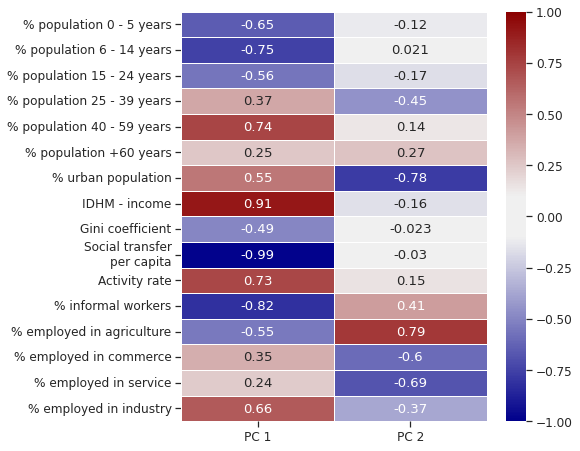

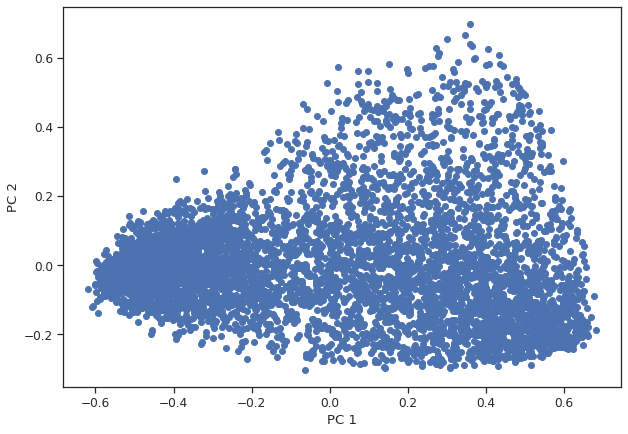

In [27]:
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(19.14)))
sns.heatmap(correlation_plot_data.T, cmap=palette, linewidths=.7, annot=correlation_plot_data.T, yticklabels=yticklabels_without_number, xticklabels=xticklabels, vmin=-1, vmax=1)
plt.show()
fig = plt.figure(figsize=(10,7))
plt.scatter(df_pca.componente_principal_1, df_pca.componente_principal_2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

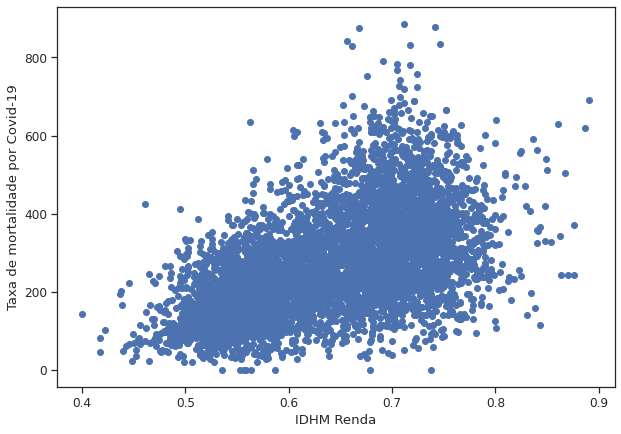

In [28]:
fig = plt.figure(figsize=(10,7))
plt.scatter(df.IDHM_RENDA, df.TAXA_OBITOS_ACUMULADO)
plt.xlabel('IDHM Renda')
plt.ylabel('Taxa de mortalidade por Covid-19')
plt.show()

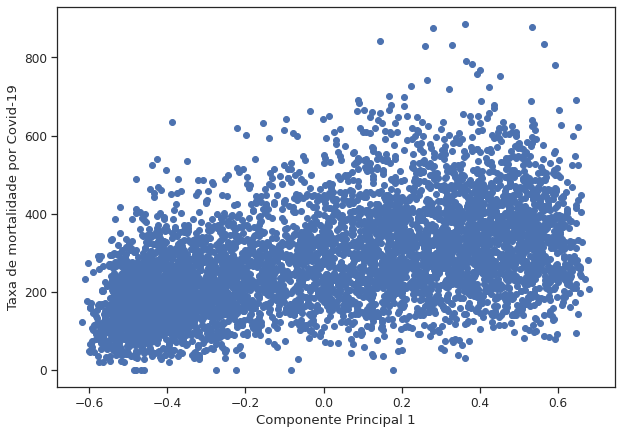

In [29]:
fig = plt.figure(figsize=(10,7))
plt.scatter(df_pca.componente_principal_1, df.loc[df_pca.index].TAXA_OBITOS_ACUMULADO)
plt.xlabel('Componente Principal 1')
plt.ylabel('Taxa de mortalidade por Covid-19')
plt.show()

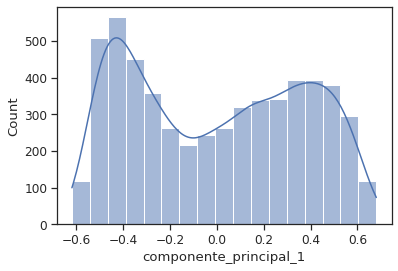

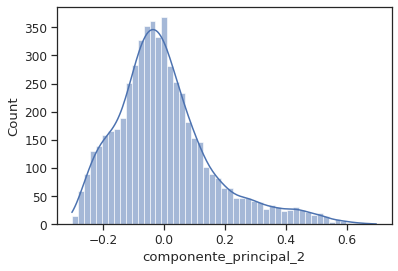

In [30]:
sns.histplot(x=df_pca.componente_principal_1, kde=True)
plt.show()
sns.histplot(x=df_pca.componente_principal_2, kde=True)
plt.show()

## Saving data

In [31]:
nome_arquivo = 'data/df_pca_risk_factors.csv'
df_pca.to_csv(nome_arquivo, index=True)
df_pca

,componente_principal_1,componente_principal_2
0,0.072382,0.095282
1,0.400133,-0.093054
2,0.293257,0.289881
3,0.470971,-0.038864
4,0.375095,-0.012960
...,...,...
5565,0.365648,0.008712
5566,0.068160,-0.086597
5567,-0.115389,-0.118670
5568,-0.194950,0.182157
